# A Brief Intro to Leverage

## Experiments

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(0)  
X = np.linspace(1, 10, 20)
y = 2.5 * X
adjusted_y = lambda x: 2.5 * x - 20

In [2]:
def plot_leverage(X, y, new_point):
    X = X.reshape(-1, 1)  # Reshape for sklearn model
    
    # Add a new leverage point
    X_leverage = np.append(X, new_point[0]).reshape(-1, 1)
    y_leverage = np.append(y, new_point[1])
    
    # Initialize the model
    model = LinearRegression()
    model_leverage = LinearRegression()
    
    # Fit the models
    model.fit(X, y)
    model_leverage.fit(X_leverage, y_leverage)
    
    # Generate X values for plotting
    X_graph = np.linspace(1, 20, 100).reshape(-1, 1)
    
    # Predict y values
    y_pred = model.predict(X_graph)
    y_pred_leverage = model_leverage.predict(X_graph)
    
    plt.figure(figsize=(12, 6))
    plt.scatter(X, y, label='Original Data')
    plt.scatter(new_point[0], new_point[1], color='orange', label='High Leverage Point', zorder=5)
    plt.plot(X_graph, y_pred, 'r', label='Original Fit')
    plt.plot(X_graph, y_pred_leverage, 'g--', label='Fit with Additional Point')
    
    print('Distance between two lines:', np.sum((y_pred - y_pred_leverage) ** 2) / len(y_pred))
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

Distance between two lines: 38.167967804921815


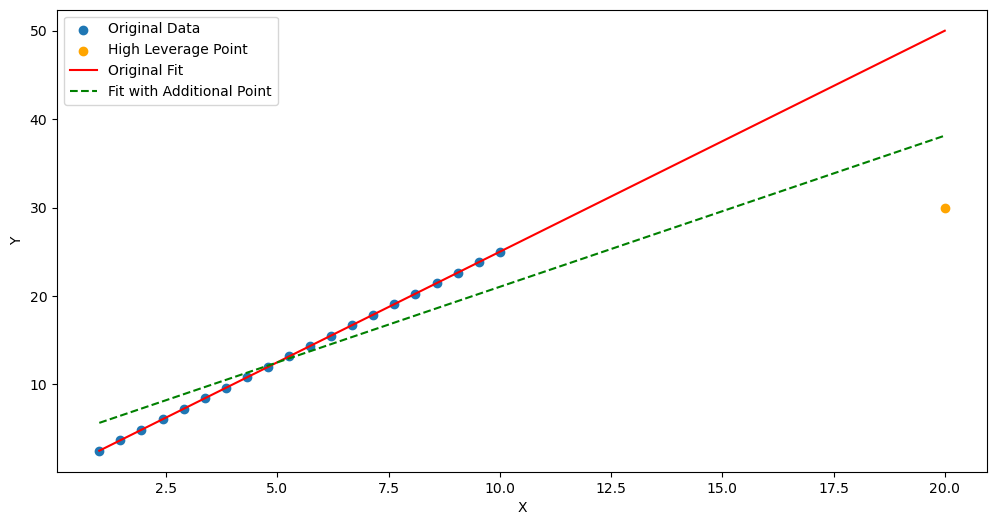

In [3]:
high_leverage = 20, adjusted_y(20)

plot_leverage(X, y, high_leverage)

Distance between two lines: 19.41311266035423


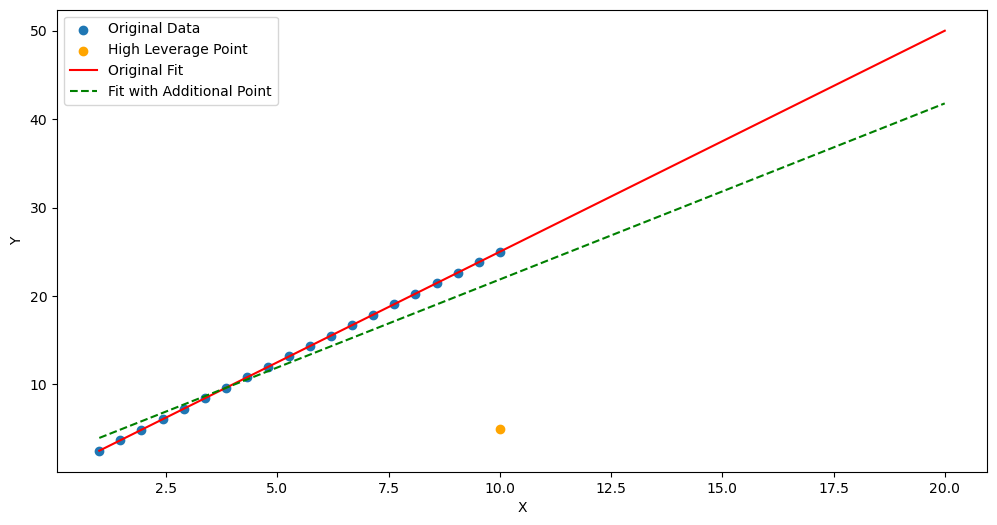

In [4]:
outlier = 10, adjusted_y(10)

plot_leverage(X, y, outlier)

(20, 30.0)
Distance between two lines: 3.505394076822652


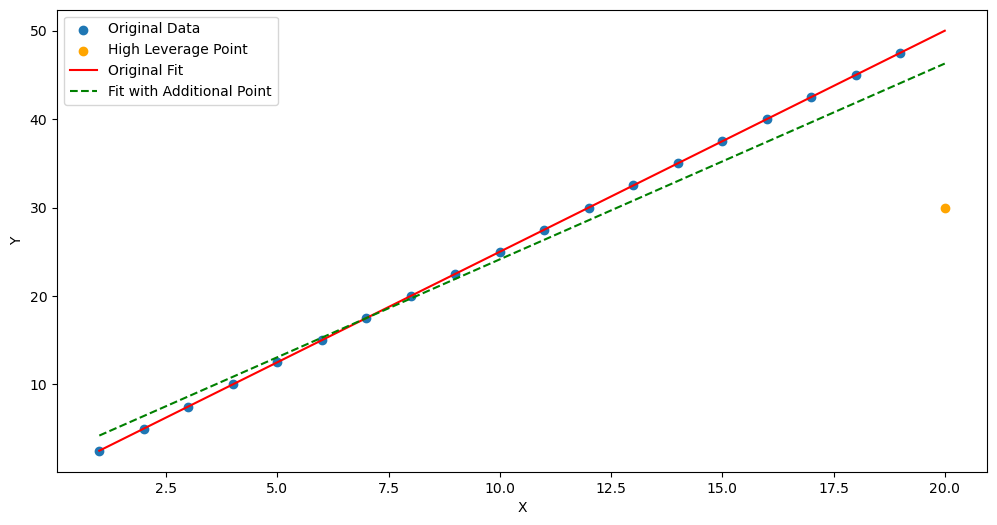

In [5]:
low_leverage = 20, adjusted_y(20)
print(low_leverage)
X_interp = np.linspace(1, 19, 19)
y = 2.5 * X_interp
plot_leverage(X_interp, y, low_leverage)

## Why: a little bit of extra stats

In regression analysis, a population linear model can be written as:

$$ Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_nX_n + \epsilon $$

We write this into matrix formulation:

$$ \mathbf{Y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\epsilon} $$

The fitted values, $\hat{\mathbf{Y}}$, are given by:

$$ \hat{\mathbf{Y}} = \mathbf{X}\hat{\boldsymbol{\beta}} $$

where $\hat{\boldsymbol{\beta}} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{Y}$ are the estimated regression coefficients. This can be rewritten as a linear mapping from $\mathbf{Y}$ to $\hat{\mathbf{Y}}$:

$$ \hat{\mathbf{Y}} = \mathbf{H}\mathbf{Y} $$

Here, the matrix $\mathbf{H} = \mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T$ is the hat matrix.

Leverage of $h_{ii}$ can be measured by the diagonal of the hat matrix 

$$h_{ii} = H_{ii} = [X(X^TX)^{-1}X^T]_{ii}$$

The diagonal elements $h_{ii}$ of $H$ quantify the influence of the $i^{th}$ observation on its own fitted value $\hat{y}_i$. $h_{ii}$ is a measure of the distance of the $i^{th}$ observation's vector of predictor values from the mean of the predictor values.

In [6]:
def leverage(X):
    H = X @ np.linalg.inv(X.T @ X) @ X.T
    return np.diag(H)

In [7]:
X_lev = np.array([np.append(X, high_leverage[0])]).T
h_lev = leverage(X_lev)

X_interp = np.array([np.linspace(1, 20, 20)]).T
h_interp = leverage(X_interp)

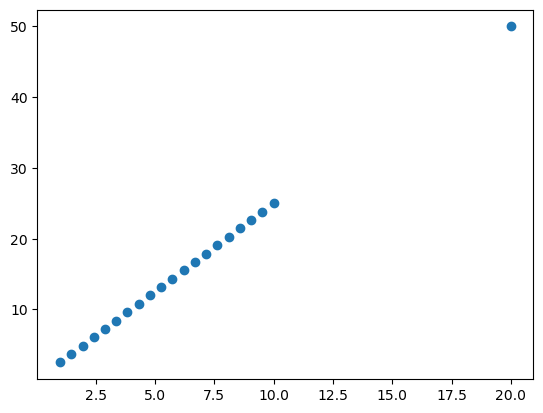

In [8]:
plt.scatter(X_lev, 2.5*X_lev)
plt.show()

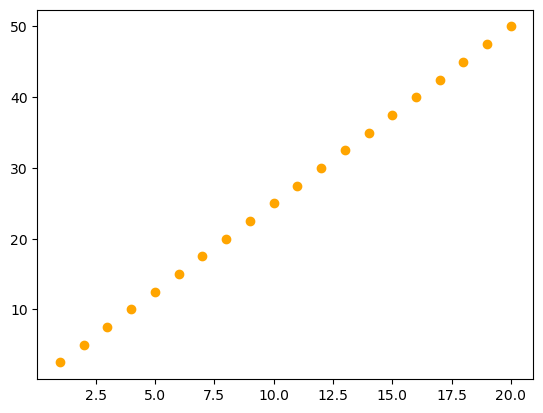

In [9]:
plt.scatter(X_interp, 2.5*X_interp, color='orange')
plt.show()

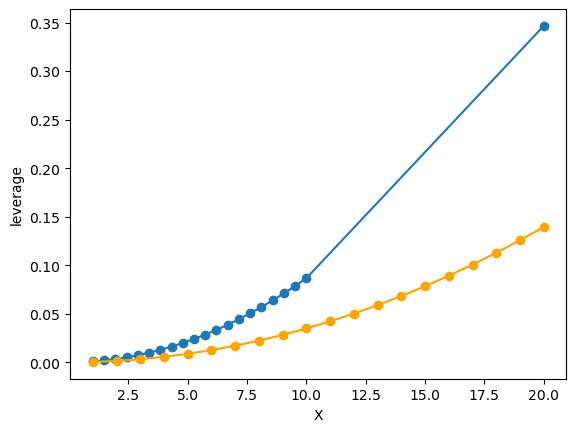

In [10]:
plt.plot(X_lev, h_lev, marker='o')
plt.plot(X_interp, h_interp, marker='o', color='orange')
plt.xlabel('X')
plt.ylabel('leverage')
plt.show()